# Decision Tree 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading data

In [2]:
data = pd.read_csv("./IRIS.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Information about the data 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# data description

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Correlation of the data

In [6]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


# visualizing of the classes 

In [7]:
from collections import Counter

c = Counter(data['species'])
print(f"Classes of the data {c.keys()}")
print(f"count of the data {c.values()}")

Classes of the data dict_keys(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
count of the data dict_values([50, 50, 50])


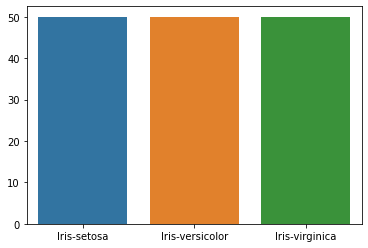

In [8]:
x = list(c.keys())
xval = []
h = list(c.values())

for i in x:
    xval.append(str(i))

sns.barplot(x=xval,y=h,data=data)
plt.show()

# LabelEncoding of the class variable

In [9]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
data['species'] = lb.fit_transform(data['species'])

# Shuffling the data 

In [10]:
from sklearn.utils import shuffle


data_S = shuffle(data.values)

In [11]:
data_S

array([[4.4, 3.2, 1.3, 0.2, 0. ],
       [5. , 3.3, 1.4, 0.2, 0. ],
       [7.2, 3.2, 6. , 1.8, 2. ],
       [5. , 3.2, 1.2, 0.2, 0. ],
       [5.9, 3.2, 4.8, 1.8, 1. ],
       [5.8, 2.6, 4. , 1.2, 1. ],
       [7.3, 2.9, 6.3, 1.8, 2. ],
       [4.4, 3. , 1.3, 0.2, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [7. , 3.2, 4.7, 1.4, 1. ],
       [6.3, 2.5, 5. , 1.9, 2. ],
       [6.3, 2.3, 4.4, 1.3, 1. ],
       [6.4, 2.8, 5.6, 2.1, 2. ],
       [5.4, 3.4, 1.5, 0.4, 0. ],
       [4.9, 2.5, 4.5, 1.7, 2. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [7.7, 3. , 6.1, 2.3, 2. ],
       [6.3, 3.3, 4.7, 1.6, 1. ],
       [5.5, 2.6, 4.4, 1.2, 1. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [6.1, 2.6, 5.6, 1.4, 2. ],
       [5.8, 2.7, 4.1, 1. , 1. ],
       [6. , 2.2, 4. , 1. , 1. ],
       [4.5, 2.3, 1.3, 0.3, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [6.8, 3.2, 5.9, 2.3, 2. ],
       [5.5, 2.4, 3.8, 1.1, 1. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [4.9, 3

# Features and Labels

In [12]:
X = data_S[:, :-1] #features
Y = data_S[:, -1] #labels 

# Scaling the data

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [14]:
X = sc.fit_transform(X)

# SPLITTING THE DATA 

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# DecisionTree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier().fit(X_train, Y_train)

In [17]:
y_pred = dc.predict(X_test)

# Metrics of the data 

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Test Accuracy score of the data {accuracy_score(y_pred, Y_test)}")
print(f"Train Accuracy score of the data {accuracy_score(dc.predict(X_train), Y_train)}")

Test Accuracy score of the data 0.9
Train Accuracy score of the data 1.0


In [19]:
print("********* TRAIN CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(dc.predict(X_train), Y_train))

print(" ")

print("********* TEST CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(y_pred, Y_test))

********* TRAIN CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

 
********* TEST CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.80      0.89      0.84         9
         2.0       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



Test confusion matrix of the data 
 [[10  0  0]
 [ 0  8  1]
 [ 0  2  9]]


<AxesSubplot:>

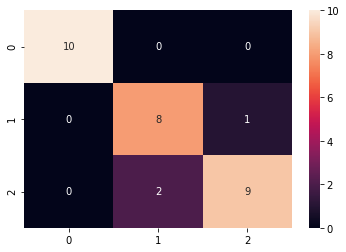

In [20]:
print(f"Test confusion matrix of the data \n {confusion_matrix(y_pred, Y_test)}")
sns.heatmap(confusion_matrix(y_pred, Y_test), annot=True)

Train confusion matrix of the data 
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]


<AxesSubplot:>

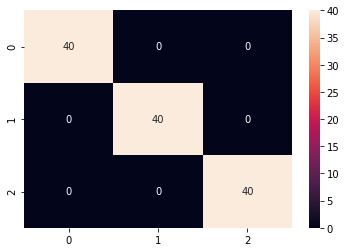

In [21]:
print(f"Train confusion matrix of the data \n {confusion_matrix(dc.predict(X_train), Y_train)}")
sns.heatmap(confusion_matrix(dc.predict(X_train), Y_train), annot=True)

# Neural nets

In [22]:
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.models import Sequential
from keras.utils import to_categorical 

# Validation data split

In [23]:
# Validation data 

X_train, X_val, Y_train, Y_val= train_test_split(X_train, Y_train, test_size=0.2)

# Categorical data

In [24]:
Y_train = to_categorical(Y_train, num_classes=3)
Y_test = to_categorical(Y_test, num_classes=3)
Y_val = to_categorical(Y_val, num_classes=3)

# Model creation

In [25]:
model = Sequential()

model.add(Dense(1024, input_shape=(X_train.shape[1],)))
model.add(Dense(512, activation="relu"))
model.add(Dense(216, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              5120      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 216)               110808    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               27776     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 9

# Compile

In [27]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model

In [28]:
history = model.fit(X_train, Y_train,
         batch_size=64,epochs=130,
         validation_data = (X_val, Y_val))

Epoch 1/130
2/2 [==============================] - 2s 860ms/step - loss: 1.0561 - accuracy: 0.3385 - val_loss: 0.5538 - val_accuracy: 0.8750
Epoch 2/130
2/2 [==============================] - 0s 84ms/step - loss: 0.6122 - accuracy: 0.7899 - val_loss: 0.3296 - val_accuracy: 0.8333
Epoch 3/130
2/2 [==============================] - 0s 87ms/step - loss: 0.3525 - accuracy: 0.8403 - val_loss: 0.4358 - val_accuracy: 0.8750
Epoch 4/130
2/2 [==============================] - 0s 85ms/step - loss: 0.4156 - accuracy: 0.8056 - val_loss: 0.3700 - val_accuracy: 0.7500
Epoch 5/130
2/2 [==============================] - 0s 87ms/step - loss: 0.3447 - accuracy: 0.8420 - val_loss: 0.2732 - val_accuracy: 0.8333
Epoch 6/130
2/2 [==============================] - 0s 86ms/step - loss: 0.2856 - accuracy: 0.8559 - val_loss: 0.3470 - val_accuracy: 0.7500
Epoch 7/130
2/2 [==============================] - 0s 83ms/step - loss: 0.3322 - accuracy: 0.8108 - val_loss: 0.2399 - val_accuracy: 0.8333
Epoch 8/130
2/2 [==

Epoch 59/130
2/2 [==============================] - 0s 107ms/step - loss: 3.8056e-04 - accuracy: 1.0000 - val_loss: 1.1413 - val_accuracy: 0.9167
Epoch 60/130
2/2 [==============================] - 0s 121ms/step - loss: 4.8990e-04 - accuracy: 1.0000 - val_loss: 1.1981 - val_accuracy: 0.9167
Epoch 61/130
2/2 [==============================] - 0s 89ms/step - loss: 0.0364 - accuracy: 0.9931 - val_loss: 2.9143 - val_accuracy: 0.8333
Epoch 62/130
2/2 [==============================] - 0s 98ms/step - loss: 2.4931 - accuracy: 0.8229 - val_loss: 0.5284 - val_accuracy: 0.9167
Epoch 63/130
2/2 [==============================] - 0s 96ms/step - loss: 0.0742 - accuracy: 0.9740 - val_loss: 0.6629 - val_accuracy: 0.9167
Epoch 64/130
2/2 [==============================] - 0s 111ms/step - loss: 0.0195 - accuracy: 0.9931 - val_loss: 0.6959 - val_accuracy: 0.9167
Epoch 65/130
2/2 [==============================] - 0s 78ms/step - loss: 0.0259 - accuracy: 0.9809 - val_loss: 0.6685 - val_accuracy: 0.9167
Ep

Epoch 116/130
2/2 [==============================] - 0s 96ms/step - loss: 3.8281e-06 - accuracy: 1.0000 - val_loss: 1.3719 - val_accuracy: 0.9167
Epoch 117/130
2/2 [==============================] - 0s 94ms/step - loss: 2.7625e-06 - accuracy: 1.0000 - val_loss: 1.3978 - val_accuracy: 0.9167
Epoch 118/130
2/2 [==============================] - 0s 95ms/step - loss: 2.9616e-06 - accuracy: 1.0000 - val_loss: 1.4102 - val_accuracy: 0.9167
Epoch 119/130
2/2 [==============================] - 0s 95ms/step - loss: 2.5729e-06 - accuracy: 1.0000 - val_loss: 1.4206 - val_accuracy: 0.9167
Epoch 120/130
2/2 [==============================] - 0s 92ms/step - loss: 2.1549e-06 - accuracy: 1.0000 - val_loss: 1.4408 - val_accuracy: 0.9167
Epoch 121/130
2/2 [==============================] - 0s 93ms/step - loss: 1.8057e-06 - accuracy: 1.0000 - val_loss: 1.4538 - val_accuracy: 0.9167
Epoch 122/130
2/2 [==============================] - 0s 92ms/step - loss: 1.7757e-06 - accuracy: 1.0000 - val_loss: 1.4641 -

# Visualizing model errors and accuracies

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


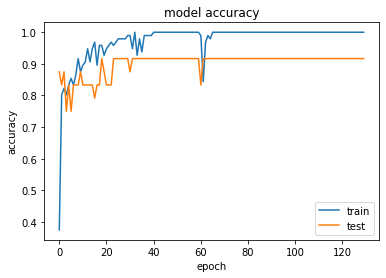

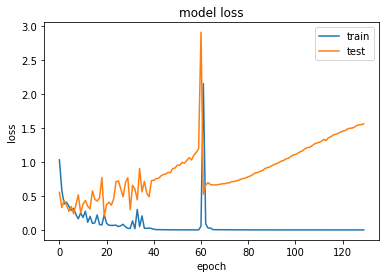

In [29]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


#Evaluating Model
score  = model.predict_classes(X_test)


# Converting into the categorical labels

In [30]:

def cate(Y_test):
    Y_test_ = []
    for i in Y_test:
        Y_test_.append(np.argmax(i))
        
    return Y_test_

Y_train_ = cate(Y_train)
Y_test_ = cate(Y_test)

# Accuracy score of the data 

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Test Accuracy score of the data {accuracy_score(score, Y_test_)}")
print(f"Train Accuracy score of the data {accuracy_score(model.predict_classes(X_train), Y_train_)}")

Test Accuracy score of the data 0.9
Train Accuracy score of the data 1.0


# Classification report 

In [32]:
print("********* TRAIN CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(model.predict_classes(X_train), Y_train_))

print(" ")

print("********* TEST CLASSIFICATION REPORT ***********")
print(" ")
print(classification_report(score, Y_test_))

********* TRAIN CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        34

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96

 
********* TEST CLASSIFICATION REPORT ***********
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.82      0.86        11
           2       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



# Confusion matrix

Test Accuracy score of the data 
 [[10  0  0]
 [ 0  9  2]
 [ 0  1  8]]


<AxesSubplot:>

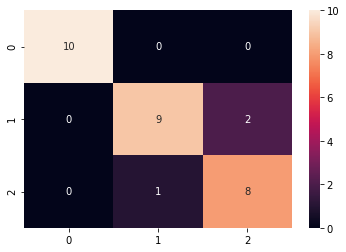

In [33]:
print(f"Test Accuracy score of the data \n {confusion_matrix(score, Y_test_)}")
sns.heatmap(confusion_matrix(score, Y_test_), annot=True)

Train Accuracy score of the data 
 [[30  0  0]
 [ 0 32  0]
 [ 0  0 34]]


<AxesSubplot:>

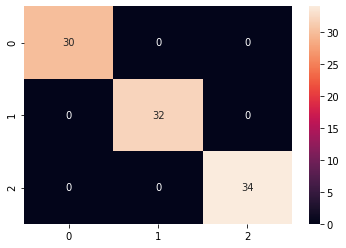

In [34]:
print(f"Train Accuracy score of the data \n {confusion_matrix(model.predict_classes(X_train), Y_train_)}")
sns.heatmap(confusion_matrix(model.predict_classes(X_train), Y_train_), annot=True)